In [19]:
# Import necessary libraries
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt
import math

In [10]:
# Import data into pandas dataframes
athlete_events = pd.read_csv("athlete_events.csv")
noc_regions = pd.read_csv("noc_regions.csv")
population = pd.read_csv("Population.csv", encoding='latin-1')
gdp = pd.read_csv("GDP.csv")

In [3]:
# Set up helper function in order to query dataframes using SQL
pysqldf = lambda q: sqldf(q, globals())

In [18]:
# Preview tables
pysqldf("SELECT * FROM athlete_events LIMIT 5")

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None


In [20]:
pysqldf("SELECT * FROM noc_regions LIMIT 5")

,NOC,region,notes
0,AFG,Afghanistan,None
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,None
3,ALG,Algeria,None
4,AND,Andorra,None


In [21]:
pysqldf("SELECT * FROM population LIMIT 5")

,Country,Population
0,Abkhazia,245424
1,Afghanistan,32890171
2,Åland Islands(Finland),30354
3,Albania,2829741
4,Algeria,44700000


In [23]:
pysqldf("SELECT * FROM gdp LIMIT 5")

,Country,GDP
0,Afghanistan,2065.0
1,Albania,13965.0
2,Algeria,11511.0
3,American Samoa,11200.0
4,Andorra,49900.0


In [43]:
# Display number of athletes per region (top 5)
athletes_per_region = pysqldf("SELECT\
            NOC,\
            COUNT(ID) AS `No. Athletes`\
        FROM\
            athlete_events\
        GROUP BY\
            NOC\
        ORDER BY\
            `No. Athletes` DESC\
        LIMIT 50")
athletes_per_region.head()

,NOC,No. Athletes
0,USA,18853
1,FRA,12758
2,GBR,12256
3,ITA,10715
4,GER,9830


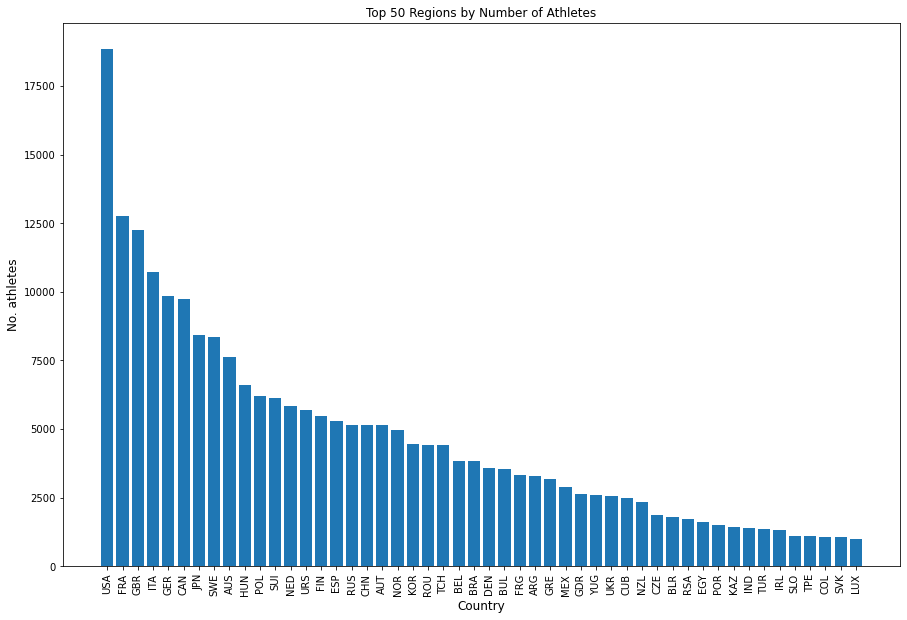

In [62]:
# Visualise as bar graph (top 50)
fig = plt.figure(figsize=(15, 10))
ax = plt.bar(athletes_per_region["NOC"], athletes_per_region["No. Athletes"])
plt.title("Top 50 Regions by Number of Athletes")
plt.xlabel("Country", fontsize=12)
plt.ylabel("No. athletes", fontsize=12)
plt.xticks(rotation = 90)
plt.show()

In [69]:
# Display number of athletes per sport (top 5)
athletes_per_event = pysqldf("SELECT\
            Sport,\
            COUNT(ID) AS `No. Athletes`\
        FROM\
            athlete_events\
        GROUP BY\
            Sport\
        ORDER BY\
            `No. Athletes` DESC")
athletes_per_event.head()

,Sport,No. Athletes
0,Athletics,38624
1,Gymnastics,26707
2,Swimming,23195
3,Shooting,11448
4,Cycling,10859


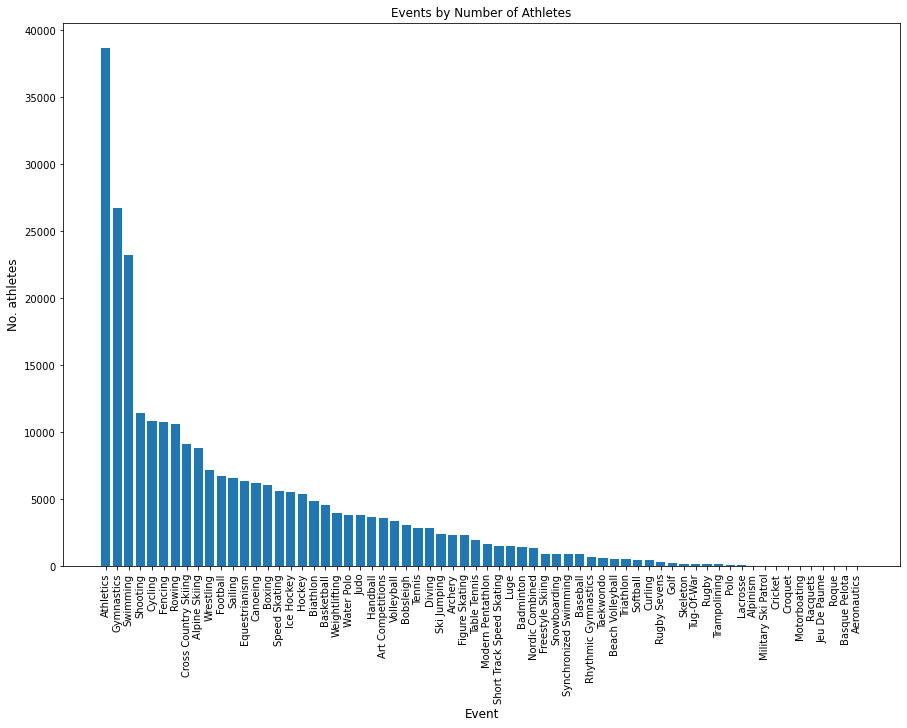

In [70]:
# Visualise as bar graph
fig = plt.figure(figsize=(15, 10))
ax = plt.bar(athletes_per_event["Sport"], athletes_per_event["No. Athletes"])
plt.title("Events by Number of Athletes")
plt.xlabel("Event", fontsize=12)
plt.ylabel("No. athletes", fontsize=12)
plt.xticks(rotation = 90)
plt.show()

In [71]:
# Find earliest and latest dates 
# and total number of years covered
pysqldf("SELECT\
            MIN(Year) AS `Earliest Year`,\
            MAX(Year) AS `Latest Year`,\
            MAX(Year) - MIN(Year) AS `Total Years`\
        FROM athlete_events")

,Earliest Year,Latest Year,Total Years
0,1896,2016,120


In [73]:
# Total number of men and women
pysqldf("SELECT\
            Sex,\
            COUNT(ID) AS `No. Athletes`\
        FROM\
            athlete_events\
        GROUP BY\
            Sex\
        ORDER BY\
            `No. Athletes` DESC")

,Sex,No. Athletes
0,M,196594
1,F,74522


In [74]:
# Age, height and weight spread
pysqldf("SELECT\
            MIN(Age) AS `Youngest Athlete`,\
            MAX(Age) AS `Oldest Athlete`,\
            MIN(Height) AS `Shortest Athlete`,\
            MAX(Height) AS `Tallest Athlete`,\
            MIN(Weight) AS `Lightest Athlete`,\
            MAX(Weight) AS `Heaviest Athlete`\
        FROM athlete_events")

,Youngest Athlete,Oldest Athlete,Shortest Athlete,Tallest Athlete,Lightest Athlete,Heaviest Athlete
0,10.0,97.0,127.0,226.0,25.0,214.0


In [75]:
# Average age, height and weight
pysqldf("SELECT\
            ROUND(AVG(Age),2) AS `Average Age`,\
            ROUND(AVG(Height),2) AS `Average Height`,\
            ROUND(AVG(Weight),2) AS `Average Weight`\
        FROM athlete_events")

,Average Age,Average Height,Average Weight
0,25.56,175.34,70.7


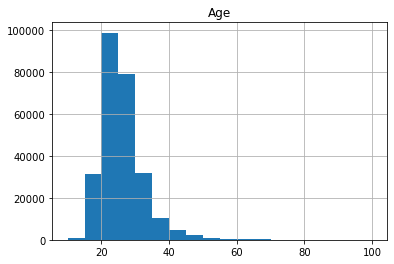

In [83]:
# Histogram of ages
pysqldf("SELECT\
            Age\
        FROM\
            athlete_events").hist(bins=range(10, 97 + 5, 5))
plt.show()

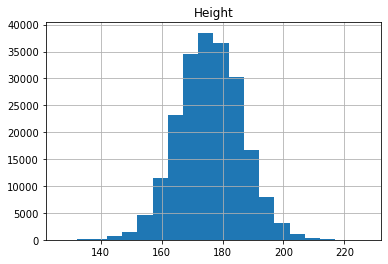

In [84]:
# Histogram of heights
pysqldf("SELECT\
            Height\
        FROM\
            athlete_events").hist(bins=range(127, 226 + 5, 5))
plt.show()

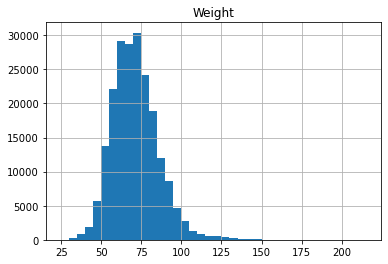

In [85]:
# Histogram of weights
pysqldf("SELECT\
            Weight\
        FROM\
            athlete_events").hist(bins=range(25, 214 + 5, 5))
plt.show()

In [86]:
# Number of medals by sex
pysqldf("SELECT\
            Medal,\
            Sex,\
            COUNT(ID) AS `No. Athletes`\
        FROM\
            athlete_events\
        GROUP BY\
            Medal,\
            Sex\
        ORDER BY CASE WHEN Medal = 'Gold' THEN '1'\
            WHEN Medal = 'Silver' THEN '2'\
            WHEN Medal = 'Bronze' THEN '3'\
            ELSE Medal END,\
        Sex")

,Medal,Sex,No. Athletes
0,None,F,63269
1,None,M,168064
2,Gold,F,3747
3,Gold,M,9625
4,Silver,F,3735
5,Silver,M,9381
6,Bronze,F,3771
7,Bronze,M,9524


In [88]:
# Number of medals by age
medals_by_age = pysqldf("SELECT\
            Age,\
            COUNT(Medal) AS `Total Medals`,\
            COUNT(ID) AS `No. Athletes`\
        FROM\
            athlete_events\
        WHERE\
            Medal IN ('Gold', 'Silver','Bronze')\
        GROUP BY\
            Age\
        ORDER BY\
            Age")
medals_by_age.head(5)

,Age,Total Medals,No. Athletes
0,NaN,732,732
1,10.0,1,1
2,11.0,1,1
3,12.0,6,6
4,13.0,16,16


In [93]:
# See we have 732 athletes for which no age information is present. Drop this first before visualising

medals_by_age = pysqldf("SELECT\
            Age,\
            COUNT(Medal) AS `Total Medals`,\
            COUNT(ID) AS `No. Athletes`\
        FROM\
            athlete_events\
        WHERE\
            (Medal IN ('Gold', 'Silver','Bronze'))\
        AND\
            (Age != 'NaN')\
        GROUP BY\
            Age\
        ORDER BY\
            Age")
medals_by_age.head(5)

,Age,Total Medals,No. Athletes
0,10.0,1,1
1,11.0,1,1
2,12.0,6,6
3,13.0,16,16
4,14.0,75,75


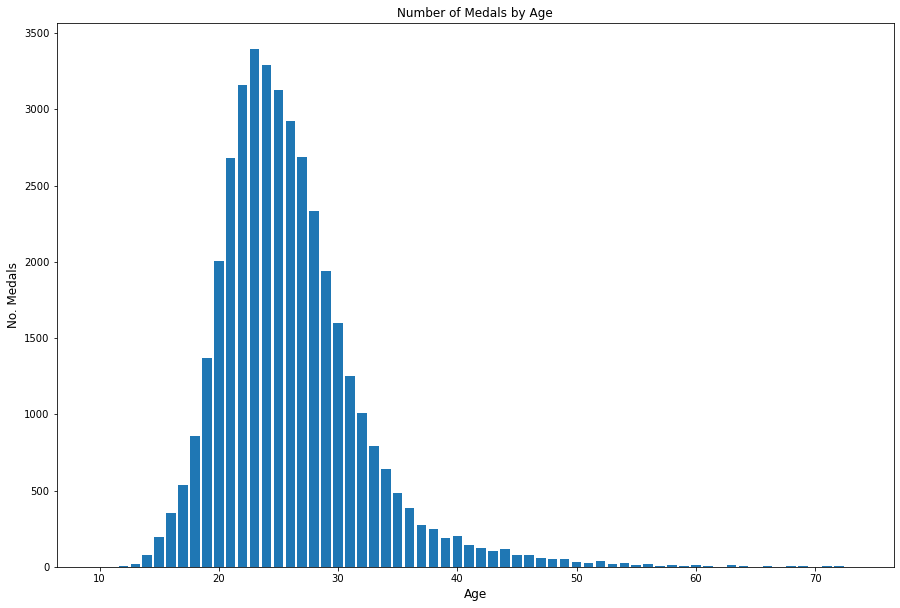

In [96]:
# Visualise as bar graph
fig = plt.figure(figsize=(15, 10))
ax = plt.bar(medals_by_age["Age"], medals_by_age["Total Medals"])
plt.title("Number of Medals by Age")
plt.xlabel("Age", fontsize=12)
plt.ylabel("No. Medals", fontsize=12)
plt.show()

In [99]:
# Create temporary table to bring in country name
temp_table = pysqldf("SELECT E.*, R.region\
            FROM athlete_events E\
            LEFT JOIN noc_regions R\
            ON E.NOC = R.NOC")

In [103]:
# Create temporary table to bring in GDP
temp_table2 = pysqldf("SELECT T.*, G.GDP\
                    FROM temp_table T\
                    LEFT JOIN gdp G\
                    ON T.region = G.Country")

In [104]:
# Create complete table with country name, GDP and population
complete_table = pysqldf("SELECT T.*, P.Population\
                        FROM temp_table2 T\
                        LEFT JOIN population P\
                        ON T.region = P.Country")

In [106]:
complete_table.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,GDP,Population
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,China,16117.0,1.411779e+09
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,China,16117.0,1.411779e+09
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,Denmark,57804.0,5.850189e+06
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,57804.0,5.850189e+06
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,Netherlands,56935.0,1.764388e+07


In [108]:
# Create subtable containing just country, medals, GDP and population
medal_gdp_population = pysqldf("SELECT\
                                    region,\
                                    COUNT(Medal) AS `Total Medals`,\
                                    GDP,\
                                    Population\
                                FROM\
                                    complete_table\
                                WHERE\
                                    Medal IN ('Gold', 'Silver','Bronze')\
                                AND\
                                    GDP IS NOT NULL\
                                GROUP BY\
                                    region,\
                                    GDP,\
                                    Population\
                                ORDER BY\
                                    COUNT(Medal) DESC")
medal_gdp_population.head(5)

,region,Total Medals,GDP,Population
0,USA,5637,62530.0,332480518.0
1,Russia,3947,27044.0,146171015.0
2,Germany,3756,53919.0,83129285.0
3,UK,2068,46659.0,67081234.0
4,France,1777,46184.0,67486000.0


In [206]:
# Calculate Pearson correlation between GDP and no. medals
temp_table3 = pysqldf("SELECT\
            COUNT(*) AS n,\
            SUM(`Total Medals`) AS sum_x,\
            SUM(GDP) AS sum_y,\
            SUM(xx) AS sum_xx,\
            SUM(yy) AS sum_yy,\
            SUM(xy) AS sum_xy\
                FROM\
                    (SELECT\
                        *,\
                        cast(`Total Medals` as bigint) * cast(`Total Medals` as bigint) AS xx,\
                        cast(GDP as bigint) * cast(GDP as bigint) AS yy,\
                        cast(`Total Medals` as bigint) * cast(GDP as bigint) AS xy\
                    FROM medal_gdp_population)")
print("GDP-Medals Correlation Coefficient: ",round(((temp_table3['n'] * temp_table3['sum_xy']\
                                               - temp_table3['sum_x'] * temp_table3['sum_y'])\
                                                / math.sqrt((temp_table3['n']*temp_table3['sum_xx'] - \
                                temp_table3['sum_x']**2)*(temp_table3['n']*temp_table3['sum_yy']\
                                - temp_table3['sum_y']**2)))[0],3))

GDP-Medals Correlation Coefficient:  0.277


In [222]:
# Calculate Pearson correlation between population and no. medals
temp_table4 = pysqldf("SELECT\
            COUNT(*) AS n,\
            SUM(`Total Medals`) AS sum_x,\
            cast(SUM(Population) as bigint) AS sum_y,\
            SUM(xx) AS sum_xx,\
            SUM(yy) AS sum_yy,\
            SUM(xy) AS sum_xy\
                FROM\
                    (SELECT\
                        *,\
                        cast(`Total Medals` as bigint) * cast(`Total Medals` as bigint) AS xx,\
                        cast(Population as bigint) * cast(Population as bigint) AS yy,\
                        cast(`Total Medals` as bigint) * cast(Population as bigint) AS xy\
                    FROM medal_gdp_population)")
print("Population-Medals Correlation Coefficient: ",round(((temp_table4['n'] * temp_table4['sum_xy']\
                                               - temp_table4['sum_x'] * temp_table4['sum_y'])\
                                                / math.sqrt((temp_table4['n']*temp_table4['sum_xx'] - \
                                # Convert largest numbers to int to prevent pandas overflow issues
                                temp_table4['sum_x']**2)*(int(temp_table4['n'])*int(temp_table4['sum_yy'])\
                                - int(temp_table4['sum_y'])**2)))[0],3))

Population-Medals Correlation Coefficient:  0.191


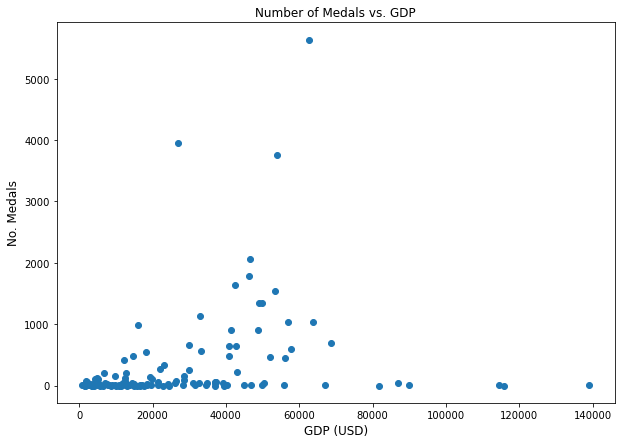

In [231]:
# Visualise the correlations
fig = plt.figure(figsize=(10, 7))
plt.scatter(medal_gdp_population['GDP'], medal_gdp_population['Total Medals'])
plt.title("Number of Medals vs. GDP")
plt.xlabel("GDP (USD)", fontsize=12)
plt.ylabel("No. Medals", fontsize=12)
plt.show()

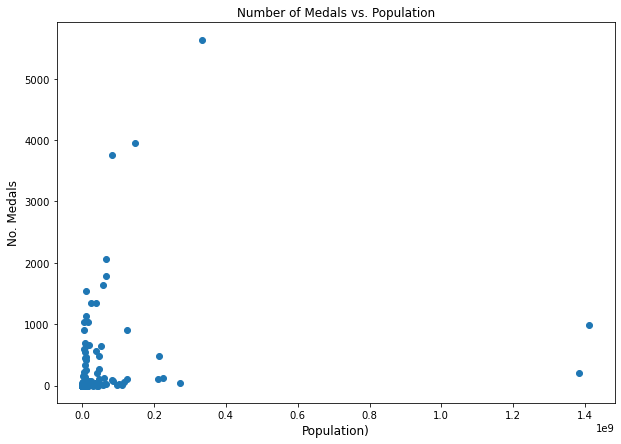

In [232]:
# Visualise the correlations
fig = plt.figure(figsize=(10, 7))
plt.scatter(medal_gdp_population['Population'], medal_gdp_population['Total Medals'])
plt.title("Number of Medals vs. Population")
plt.xlabel("Population)", fontsize=12)
plt.ylabel("No. Medals", fontsize=12)
plt.show()

In [233]:
# Clear outliers in both graphs. See if removing these affects the correlation
# Remove countries with GDP >= 70,000
temp_table3 = pysqldf("SELECT\
            COUNT(*) AS n,\
            SUM(`Total Medals`) AS sum_x,\
            SUM(GDP) AS sum_y,\
            SUM(xx) AS sum_xx,\
            SUM(yy) AS sum_yy,\
            SUM(xy) AS sum_xy\
                FROM\
                    (SELECT\
                        *,\
                        cast(`Total Medals` as bigint) * cast(`Total Medals` as bigint) AS xx,\
                        cast(GDP as bigint) * cast(GDP as bigint) AS yy,\
                        cast(`Total Medals` as bigint) * cast(GDP as bigint) AS xy\
                    FROM medal_gdp_population\
                    WHERE\
                        GDP < 70000)")
print("GDP-Medals Correlation Coefficient: ",round(((temp_table3['n'] * temp_table3['sum_xy']\
                                               - temp_table3['sum_x'] * temp_table3['sum_y'])\
                                                / math.sqrt((temp_table3['n']*temp_table3['sum_xx'] - \
                                temp_table3['sum_x']**2)*(temp_table3['n']*temp_table3['sum_yy']\
                                - temp_table3['sum_y']**2)))[0],3))

GDP-Medals Correlation Coefficient:  0.475


In [234]:
# Remove countries with Population >= 500,000,000
temp_table4 = pysqldf("SELECT\
            COUNT(*) AS n,\
            SUM(`Total Medals`) AS sum_x,\
            cast(SUM(Population) as bigint) AS sum_y,\
            SUM(xx) AS sum_xx,\
            SUM(yy) AS sum_yy,\
            SUM(xy) AS sum_xy\
                FROM\
                    (SELECT\
                        *,\
                        cast(`Total Medals` as bigint) * cast(`Total Medals` as bigint) AS xx,\
                        cast(Population as bigint) * cast(Population as bigint) AS yy,\
                        cast(`Total Medals` as bigint) * cast(Population as bigint) AS xy\
                    FROM medal_gdp_population\
                    WHERE\
                        Population < 500000000)")
print("Population-Medals Correlation Coefficient: ",round(((temp_table4['n'] * temp_table4['sum_xy']\
                                               - temp_table4['sum_x'] * temp_table4['sum_y'])\
                                                / math.sqrt((temp_table4['n']*temp_table4['sum_xx'] - \
                                # Convert largest numbers to int to prevent pandas overflow issues
                                temp_table4['sum_x']**2)*(int(temp_table4['n'])*int(temp_table4['sum_yy'])\
                                - int(temp_table4['sum_y'])**2)))[0],3))

Population-Medals Correlation Coefficient:  0.471


In [ ]:
# Some positive correlation between GDP and medals, and Population and medals (especially once outliers removed)
# but not particualrly strong correlation.